# Quiz 1 Analysis of the results

## Let's analyze Quiz 1 final results 
Below are code snippets for you to run and analyze data on Quiz 1 grades

Try to answer questions:
* What was the hardest/easiest question for students?
* Are there any outliers?
* What can you say about class's grade distribution?
* On future quizzes can we expect similar distribution of grades?

In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

filepath = r"C:\Users\Shakhizat\Documents\_SDU\css429_das\quizzes\quiz1_descriptive\css429_quiz1_data_final_upload.csv"

# Read the data set of "Marketing Analysis" in data.
data= pd.read_csv(filepath, sep=",")

# Printing the data
data.head()

,State,Started on,Completed,Time taken,Grade/10.00,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00
0,Finished,24 September 2020 5:47 PM,24 September 2020 5:50 PM,2 mins 46 secs,10.00,1.00,1.00,1.0,1.0,1.0,1.00,1.00,1.0,1.0,1.0
1,Finished,24 September 2020 12:58 PM,24 September 2020 1:04 PM,5 mins 58 secs,9.67,1.00,0.67,1.0,1.0,1.0,1.00,1.00,1.0,1.0,1.0
2,Finished,24 September 2020 3:34 PM,24 September 2020 3:47 PM,12 mins 24 secs,9.50,0.50,1.00,1.0,1.0,1.0,1.00,1.00,1.0,1.0,1.0
3,Finished,23 September 2020 11:18 AM,23 September 2020 11:22 AM,3 mins 38 secs,5.50,0.00,0.00,0.5,1.0,0.0,1.00,0.00,1.0,1.0,1.0
4,Finished,24 September 2020 4:11 PM,24 September 2020 4:21 PM,10 mins 2 secs,10.00,1.00,1.00,1.0,1.0,1.0,1.00,1.00,1.0,1.0,1.0


In [3]:
data.shape

(87, 15)

In [4]:
# Checking the missing values
data.isnull().sum()

State          1
Started on     1
Completed      1
Time taken     1
Grade/10.00    0
Q. 1 /1.00     0
Q. 2 /1.00     0
Q. 3 /1.00     0
Q. 4 /1.00     0
Q. 5 /1.00     0
Q. 6 /1.00     0
Q. 7 /1.00     0
Q. 8 /1.00     0
Q. 9 /1.00     0
Q. 10 /1.00    0
dtype: int64

In [5]:
# Dropping the null records and the ones that never been submitted
data[data['State'] == 'Finished'].copy()

,State,Started on,Completed,Time taken,Grade/10.00,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00
0,Finished,24 September 2020 5:47 PM,24 September 2020 5:50 PM,2 mins 46 secs,10.00,1.00,1.00,1.00,1.0,1.0,1.00,1.00,1.0,1.0,1.0
1,Finished,24 September 2020 12:58 PM,24 September 2020 1:04 PM,5 mins 58 secs,9.67,1.00,0.67,1.00,1.0,1.0,1.00,1.00,1.0,1.0,1.0
2,Finished,24 September 2020 3:34 PM,24 September 2020 3:47 PM,12 mins 24 secs,9.50,0.50,1.00,1.00,1.0,1.0,1.00,1.00,1.0,1.0,1.0
3,Finished,23 September 2020 11:18 AM,23 September 2020 11:22 AM,3 mins 38 secs,5.50,0.00,0.00,0.50,1.0,0.0,1.00,0.00,1.0,1.0,1.0
4,Finished,24 September 2020 4:11 PM,24 September 2020 4:21 PM,10 mins 2 secs,10.00,1.00,1.00,1.00,1.0,1.0,1.00,1.00,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Finished,24 September 2020 1:06 PM,24 September 2020 1:14 PM,8 mins 6 secs,9.00,1.00,0.00,1.00,1.0,1.0,1.00,1.00,1.0,1.0,1.0
82,Finished,24 September 2020 4:57 PM,24 September 2020 4:59 PM,2 mins 3 secs,10.00,1.00,1.00,1.00,1.0,1.0,1.00,1.00,1.0,1.0,1.0
83,Finished,24 September 2020 3:51 PM,24 September 2020 4:09 PM,18 mins 8 secs,9.50,0.50,1.00,1.00,1.0,1.0,1.00,1.00,1.0,1.0,1.0
84,Finished,24 September 2020 4:46 PM,24 September 2020 5:07 PM,21 mins 34 secs,5.75,1.00,-,0.75,1.0,1.0,0.00,-,0.0,1.0,1.0


In [6]:
#check for data types
data.dtypes

State           object
Started on      object
Completed       object
Time taken      object
Grade/10.00    float64
Q. 1 /1.00      object
Q. 2 /1.00      object
Q. 3 /1.00     float64
Q. 4 /1.00     float64
Q. 5 /1.00     float64
Q. 6 /1.00      object
Q. 7 /1.00      object
Q. 8 /1.00     float64
Q. 9 /1.00     float64
Q. 10 /1.00    float64
dtype: object

In [7]:
#get columns names
data.columns

Index(['State', 'Started on', 'Completed', 'Time taken', 'Grade/10.00',
       'Q. 1 /1.00', 'Q. 2 /1.00', 'Q. 3 /1.00', 'Q. 4 /1.00', 'Q. 5 /1.00',
       'Q. 6 /1.00', 'Q. 7 /1.00', 'Q. 8 /1.00', 'Q. 9 /1.00', 'Q. 10 /1.00'],
      dtype='object')

In [8]:
#get the column names that need conversion
cols = ['Grade/10.00', 'Q. 1 /1.00', 'Q. 2 /1.00', 'Q. 3 /1.00', 'Q. 4 /1.00', 'Q. 5 /1.00', \
        'Q. 6 /1.00', 'Q. 7 /1.00', 'Q. 8 /1.00', 'Q. 9 /1.00', 'Q. 10 /1.00']

#convert to numeric
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

#check the types
data.dtypes

State           object
Started on      object
Completed       object
Time taken      object
Grade/10.00    float64
Q. 1 /1.00     float64
Q. 2 /1.00     float64
Q. 3 /1.00     float64
Q. 4 /1.00     float64
Q. 5 /1.00     float64
Q. 6 /1.00     float64
Q. 7 /1.00     float64
Q. 8 /1.00     float64
Q. 9 /1.00     float64
Q. 10 /1.00    float64
dtype: object

In [9]:
#descriptive stats on numeric columns
data.describe()

,Grade/10.00,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00
count,87.000000,86.000000,86.000000,87.000000,87.000000,87.000000,86.000000,85.000000,87.000000,87.000000,87.000000
mean,8.652069,0.882209,0.745000,0.892414,0.941839,0.883678,0.846977,0.892588,0.941839,0.813908,0.860460
std,1.684734,0.261752,0.338397,0.236682,0.234007,0.320560,0.359932,0.309305,0.234007,0.389144,0.346504
min,1.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.835000,1.000000,0.415000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,9.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#descriptive stats on Final Grade column
data['Grade/10.00'].describe()

count    87.000000
mean      8.652069
std       1.684734
min       1.670000
25%       7.835000
50%       9.250000
75%      10.000000
max      10.000000
Name: Grade/10.00, dtype: float64

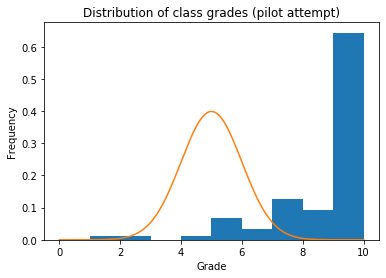

In [11]:
# histogram
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.hist(data["Grade/10.00"], bins=bins, density=1)
plt.gca().set(title='Distribution of class grades (pilot attempt)', xlabel='Grade', ylabel='Frequency')

plt.plot(np.linspace(0, 10, 1000), stats.norm.pdf(np.linspace(-5, 5, 1000)))

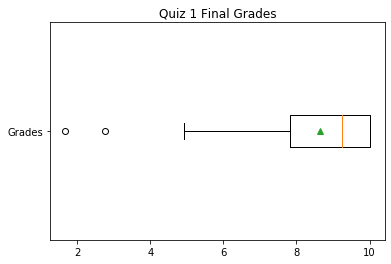

In [13]:
# boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Quiz 1 Final Grades')
ax1.boxplot(data["Grade/10.00"], vert=False, showmeans=True)
plt.yticks([1], ['Grades'])
plt.show()